In [1]:
import os
import cv2
import numpy as np

def load_images_from_directory(directory_path):
    """
    Carrega todas as imagens de um diretório e retorna uma lista de arrays numpy.

    Args:
        directory_path (str): Caminho para o diretório contendo as imagens.
        
    Returns:
        list: Lista de arrays numpy representando as imagens.
    """
    images = []
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.jpg')):
            file_path = os.path.join(directory_path, filename)
            img = cv2.imread(file_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Erro ao carregar a imagem {filename}")
    return images

# Defina o caminho para o diretório de imagens
directory_path = 'defungi_dataset/H1'
images = load_images_from_directory(directory_path)

    # Exiba o número de imagens carregadas
print(f"Total de imagens carregadas do diretório {directory_path}: {len(images)}")

# Exiba o número de imagens carregadas
print(f"Total de imagens carregadas: {len(images)}")

Total de imagens carregadas do diretório defungi_dataset/H1: 4404
Total de imagens carregadas: 4404


In [8]:
import matplotlib.pyplot as plt
    
def plot_images(images, num_images=5):
    """
    Plota as primeiras 'num_images' imagens em escala de cinza.

    Args:
        images (list): Lista de arrays numpy representando as imagens.
        num_images (int): Número de imagens a serem plotadas.
    """
    
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

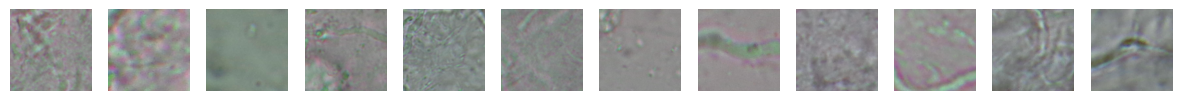

In [9]:
plot_images(images, num_images=12)

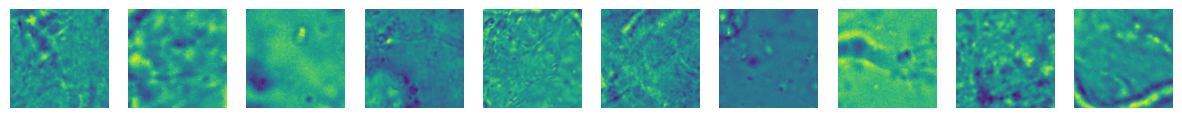

In [10]:
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

plot_images(images_gray, num_images=10)

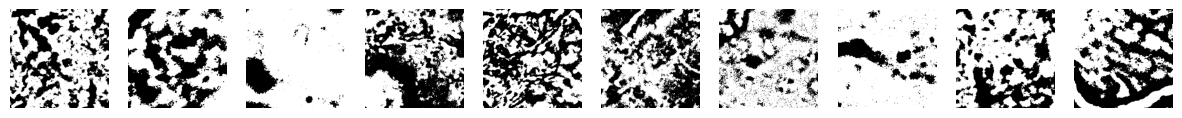

In [75]:
images_binary = [cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] for img in images_gray]

plt.figure(figsize=(15, 5))
for i in range(min(10, len(images_binary))):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images_binary[i], cmap='gray')
    plt.axis('off')
plt.show()

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2025-07-03 14:57:02.230840: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-03 14:57:02.362957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751565422.410363   68927 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751565422.424052   68927 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751565422.533612   68927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Num GPUs Available:  1


In [3]:
def preprocess_images(images):
	"""
	Preprocess images by resizing and flattening them.

	Args:
		images (list): List of numpy arrays representing images.

	Returns:
		np.array: Flattened and resized images.
	"""
	resized_images = [cv2.resize(img, (64, 64)) for img in images]
	flattened_images = [img.flatten() for img in resized_images]
	return np.array(flattened_images)

In [4]:
if not tf.test.is_gpu_available():
	print("GPU não está disponível. Certifique-se de que o TensorFlow com suporte a GPU está instalado e configurado corretamente.")
else:
	print("GPU disponível. O código será executado na placa de vídeo.")


def apply_svm(X_train, X_test, y_train, y_test):
	"""
	Apply SVM algorithm to the dataset.

	Args:
		X_train, X_test, y_train, y_test: Training and testing data.

	Returns:
		float: Accuracy of the model.
	"""
	svm = SVC(kernel='linear')
	svm.fit(X_train, y_train)
	y_pred = svm.predict(X_test)
	return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted')

def apply_knn(X_train, X_test, y_train, y_test):
	"""
	Apply KNN algorithm to the dataset.

	Args:
		X_train, X_test, y_train, y_test: Training and testing data.

	Returns:
		float: Accuracy of the model.
	"""
	knn = KNeighborsClassifier(n_neighbors=5)
	knn.fit(X_train, y_train)
	y_pred = knn.predict(X_test)
	return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU disponível. O código será executado na placa de vídeo.


I0000 00:00:1751565424.658389   68927 gpu_device.cc:2019] Created device /device:GPU:0 with 10280 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
X = preprocess_images(images)
y = np.random.randint(0, 2, len(images))  # Example labels (binary classification)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply algorithms
svm_accuracy, svm_precision = apply_svm(X_train, X_test, y_train, y_test)
knn_accuracy, knn_precision = apply_knn(X_train, X_test, y_train, y_test)
# cnn_accuracy = apply_cnn(X_train, X_test, y_train, y_test)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")

print(f"SVM Precision: {svm_precision}")
print(f"KNN Precision: {knn_precision}")

SVM Accuracy: 0.5141884222474461
KNN Accuracy: 0.5005675368898979
SVM Precision: 0.5143960659945342
KNN Precision: 0.5003966462257448


In [6]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import os

def extrair_embeddings_clip(caminho_pasta):
    """
    Carrega imagens de uma pasta, extrai embeddings com CLIP e retorna os vetores.

    Args:
        caminho_pasta (str): Caminho da pasta com imagens.

    Returns:
        List[str], np.ndarray: Lista de caminhos das imagens, e matriz de embeddings (N x 512)
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    print("Usando dispositivo:", device)

    # Carrega modelo CLIP + processador
    model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Carrega imagens da pasta
    image_paths = [os.path.join(caminho_pasta, f) for f in os.listdir(caminho_pasta) if f.endswith((".jpg", ".png"))]
    images = [Image.open(p).convert("RGB") for p in image_paths]

    # Divide em batches
    batch_size = 16
    embeddings_list = []

    for i in range(0, len(images), batch_size):
        batch_imgs = images[i:i+batch_size]
        inputs = processor(images=batch_imgs, return_tensors="pt", padding=True).to(device)
        with torch.no_grad():
            emb = model.get_image_features(**inputs)
            emb = emb / emb.norm(dim=1, keepdim=True)  # normaliza
            embeddings_list.append(emb.cpu())

    all_embeddings = torch.cat(embeddings_list, dim=0).numpy()
    return image_paths, all_embeddings


/home/luiz/Documentos/fungi-image-processing-benchmark/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Usando dispositivo: cuda


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


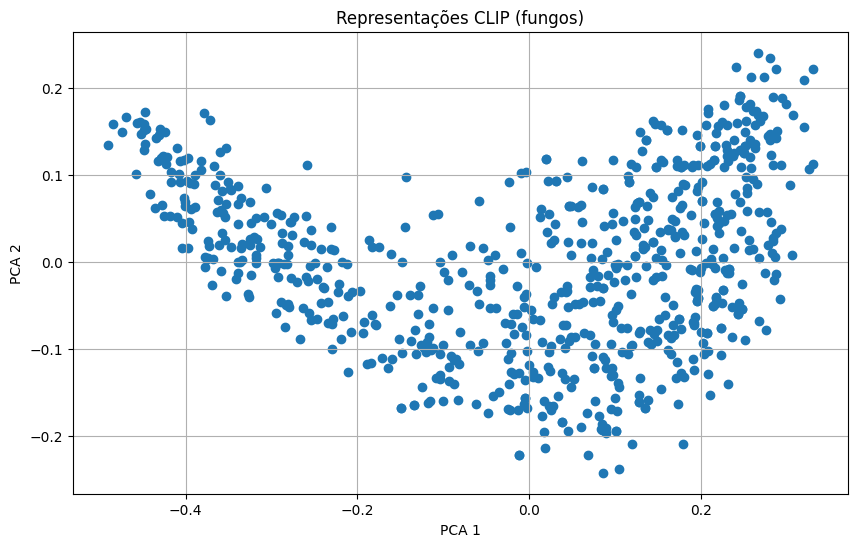

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

caminhos, embeddings = extrair_embeddings_clip("defungi_dataset/H6")

# PCA para reduzir para 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.title("Representações CLIP (fungos)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
